In [15]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


In [16]:
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt

(-1, 10)

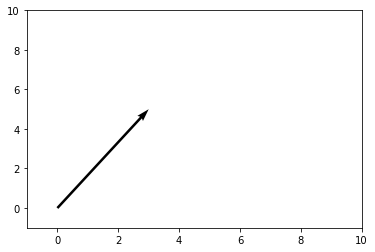

In [17]:
plt.figure()
ax = plt.gca()
ax.quiver([3], [5], angles = 'xy', scale_units = 'xy', scale = 1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])

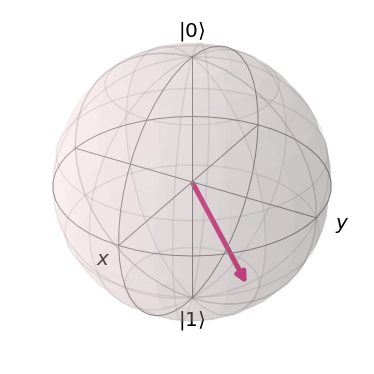

In [18]:
plot_bloch_vector([1, 1 ,0])

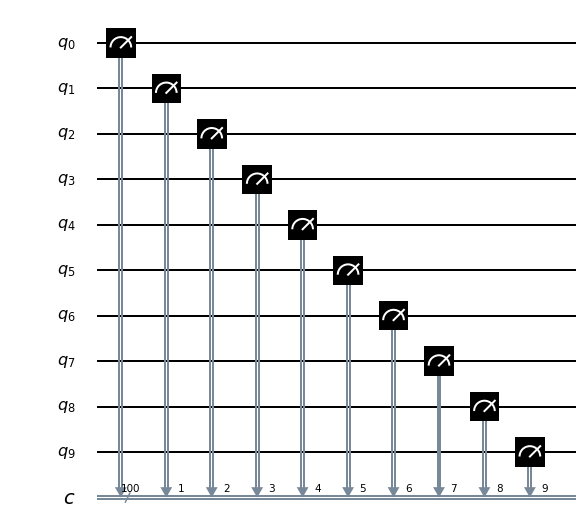

In [34]:
#Simple circuit to initialise and measure qubits. Qubits always have 0 as their intialised value. In this case we don't send qubits through
# a gate or anything. So they remain 0.
q = QuantumCircuit(10,10)
for i in range(10):
    q.measure(i,i)
q.draw()

In [35]:
counts = execute(q,Aer.get_backend('qasm_simulator')).result()
#plot_histogram(counts)
counts.get_counts()

{'0000000000': 1024}

In [36]:
#In a circuit we typically need to do three jobs: 
#First encode the input, then do some actual computation and finally extract an output.
n = 4
n_b = 4
n_q = 4
qc_output = QuantumCircuit(n_q, n_b)

In [37]:
#The command qc.measure(j,j) adds a measurement to our circuit qc that tells qubit j to write an output to bit j.
for i in range(n):
    qc_output.measure(i,i)
    

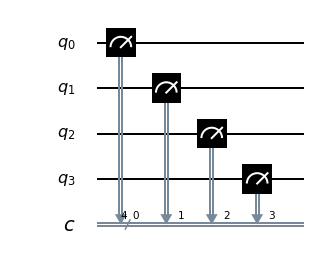

In [38]:
qc_output.draw(output = 'mpl')

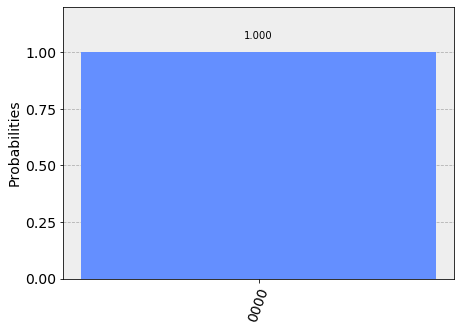

In [39]:
#Qubits are always initialized to give the output 0. Since we don't do anything to our qubits in the circuit above, this is exactly the result we'll get when we measure them.
#Note that this result comes from a quantum simulator, which is a standard computer calculating what a quantum computer would do. 
#Simulations are only possible for small numbers of qubits,
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

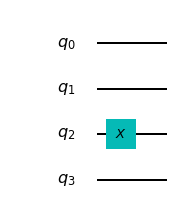

In [40]:
#How do we create a circuit and put gates in?
qc_gates = QuantumCircuit(n)
qc_gates.x(2)
qc_gates.draw(output = 'mpl')

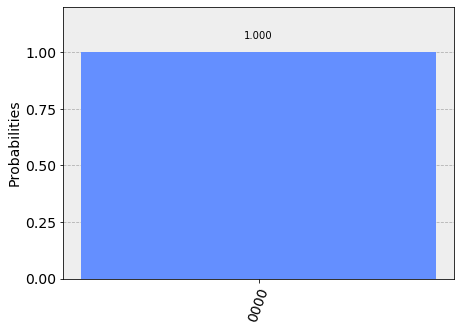

In [41]:
#We now plot the new circuit with a pauli x gate.
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

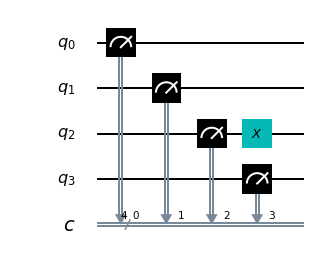

In [42]:
#We can even add quantum circuits. Note that the order of addition matters.
qc_1 = qc_output + qc_gates
qc_2 = qc_gates + qc_output

qc_1.draw(output = 'mpl')

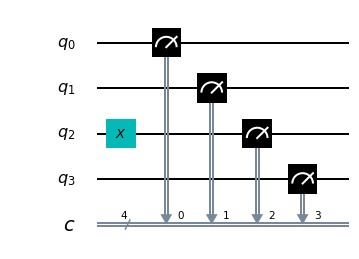

In [50]:
#justify has options right, left or none. It's kinda wierd. Need to look into it later.
qc_2.draw(output = 'mpl', justify = 'None')

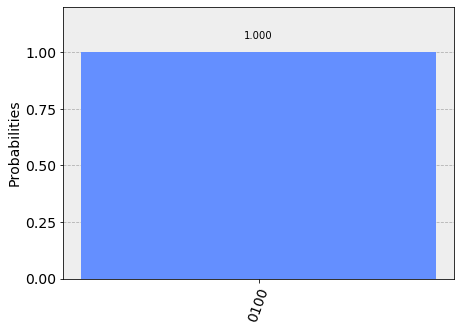

In [51]:
counts = execute(qc_2,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

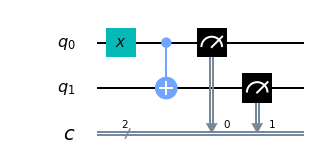

In [55]:
#introduction to the controlled-not gate (cnot)
#it looks at its two input bits to see whether they are the same or different. 
#Then it writes over the target qubit with the answer. 
#The target becomes 0 if they are the same, and 1 if they are different.
qc_not = QuantumCircuit(2,2)
qc_not.x(0)
qc_not.cx(0,1)
qc_not.measure(0,0)
qc_not.measure(1,1)
qc_not.draw(output='mpl')

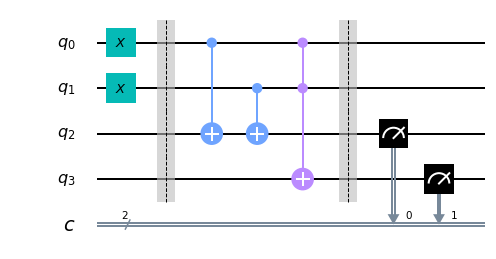

In [64]:
#Using a cx(Controlled not gate) and a ccx(Toffoli gate). The below thing makes sense if you go step by step and use 0s and 1s.

qc_ha = QuantumCircuit(4,2)
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.ccx(0,1,3)
qc_ha.barrier()
qc_ha.measure(2,0)
qc_ha.measure(3,1)

qc_ha.draw(output = 'mpl')

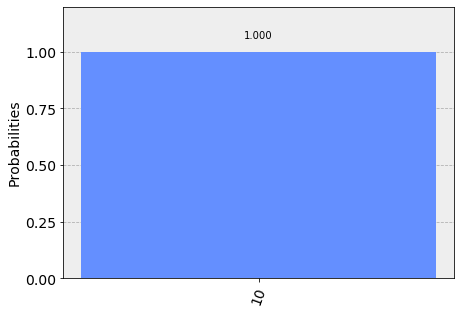

In [65]:
counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)